In [670]:
#Initialisation Cell
import math
import numpy as np
import pandas as pd
#import pandas_ta as ta
from numpy import linalg as LA
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [671]:
def hist(data,name,bins):
    plt.hist(data,bins=bins)
    plt.title(name)
    plt.show()

<h2>Import Data</h2>

In [672]:
df = pd.read_csv("GBPUSD_Candlestick_1_M_BID_12.03.2019-12.03.2022.csv")

df

,Local time,Open,High,Low,Close,Volume
0,12.03.2019 00:00:00.000 GMT+0200,1.31887,1.31901,1.31865,1.31887,305.47
1,12.03.2019 00:01:00.000 GMT+0200,1.31889,1.31940,1.31881,1.31936,277.34
2,12.03.2019 00:02:00.000 GMT+0200,1.31939,1.32333,1.31934,1.32321,345.94
3,12.03.2019 00:03:00.000 GMT+0200,1.32321,1.32866,1.32310,1.32845,365.84
4,12.03.2019 00:04:00.000 GMT+0200,1.32845,1.32889,1.32511,1.32536,467.78
...,...,...,...,...,...,...
1128222,11.03.2022 23:55:00.000 GMT+0200,1.30368,1.30386,1.30364,1.30364,46.31
1128223,11.03.2022 23:56:00.000 GMT+0200,1.30363,1.30397,1.30359,1.30362,77.25
1128224,11.03.2022 23:57:00.000 GMT+0200,1.30363,1.30363,1.30361,1.30361,17.17
1128225,11.03.2022 23:58:00.000 GMT+0200,1.30361,1.30398,1.30361,1.30371,62.32


<h2>Clean the Data</h2>

<h3>Get Statistical Summary of the data</h3>

In [673]:
print("The data has the following shape:\n%d rows and %d columns" %(df.shape[0],df.shape[1]))
print(df.head())
print("The statistical summary is given as:")
print(df.describe())
print("Data set consist of the following data types")
df.dtypes

The data has the following shape:
1128227 rows and 6 columns
                         Local time     Open     High      Low    Close  \
0  12.03.2019 00:00:00.000 GMT+0200  1.31887  1.31901  1.31865  1.31887   
1  12.03.2019 00:01:00.000 GMT+0200  1.31889  1.31940  1.31881  1.31936   
2  12.03.2019 00:02:00.000 GMT+0200  1.31939  1.32333  1.31934  1.32321   
3  12.03.2019 00:03:00.000 GMT+0200  1.32321  1.32866  1.32310  1.32845   
4  12.03.2019 00:04:00.000 GMT+0200  1.32845  1.32889  1.32511  1.32536   

   Volume  
0  305.47  
1  277.34  
2  345.94  
3  365.84  
4  467.78  
The statistical summary is given as:
               Open          High           Low         Close        Volume
count  1.128227e+06  1.128227e+06  1.128227e+06  1.128227e+06  1.128227e+06
mean   1.315328e+00  1.315434e+00  1.315222e+00  1.315327e+00  1.187006e+02
std    5.638901e-02  5.637545e-02  5.640176e-02  5.638898e-02  2.821358e+02
min    1.141000e+00  1.141650e+00  1.140950e+00  1.141010e+00  0.000000e+00

Local time     object
Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
dtype: object

<h3>Remove Useless features</h3>

In [674]:
df = df.drop('Local time',axis=1)

<h3>Remove missing data if any</h3>

In [675]:
missingValuesForOpen = np.where(df["Open"].isnull() == True)
infValuesForOpen = np.where(np.isinf(df["Open"]) == True)
print('There are',len(missingValuesForOpen[0]),'missing values and',len(infValuesForOpen[0]),'inf values in the Open column:',missingValuesForOpen,infValuesForOpen)


missingValuesForHigh = np.where(df["High"].isnull() == True)
infValuesForHigh = np.where(np.isinf(df["High"]) == True)
print('There are',len(missingValuesForHigh[0]),'missing values and',len(infValuesForHigh[0]),'inf values in the High column:',missingValuesForHigh,infValuesForHigh)

missingValuesForLow = np.where(df["Low"].isnull() == True)
infValuesForLow = np.where(np.isinf(df["Low"]) == True)
print('There are',len(missingValuesForLow[0]),'missing values and',len(infValuesForLow[0]),'inf values in the Low column:',missingValuesForLow,infValuesForLow)

missingValuesForClose = np.where(df["Close"].isnull() == True)
infValuesForClose = np.where(np.isinf(df["Close"]) == True)
print('There are',len(missingValuesForClose[0]),'missing values and',len(infValuesForClose[0]),'inf values in the Close column:',missingValuesForClose,infValuesForClose)

missingValuesForVolume = np.where(df["Volume"].isnull() == True)
infValuesForVolume = np.where(np.isinf(df["Volume"]) == True)
print('There are',len(missingValuesForVolume[0]),'missing values and',len(infValuesForVolume[0]),'inf values in the Volume column:',missingValuesForVolume,infValuesForVolume)

There are 0 missing values and 0 inf values in the Open column: (array([], dtype=int64),) (array([], dtype=int64),)
There are 0 missing values and 0 inf values in the High column: (array([], dtype=int64),) (array([], dtype=int64),)
There are 0 missing values and 0 inf values in the Low column: (array([], dtype=int64),) (array([], dtype=int64),)
There are 0 missing values and 0 inf values in the Close column: (array([], dtype=int64),) (array([], dtype=int64),)
There are 0 missing values and 0 inf values in the Volume column: (array([], dtype=int64),) (array([], dtype=int64),)


<h3>Feature Scaling</h3>

In [676]:
sx = preprocessing.MinMaxScaler()
scaled_X = sx.fit_transform(df.drop('Close',axis=1))[:,:]
scaled_X

array([[6.27119839e-01, 6.26138530e-01, 6.26874096e-01, 1.73971032e-03],
       [6.27190354e-01, 6.27515357e-01, 6.27438530e-01, 1.57950457e-03],
       [6.28953214e-01, 6.41389536e-01, 6.29308216e-01, 1.97019475e-03],
       ...,
       [5.73387864e-01, 5.71842124e-01, 5.73817335e-01, 9.77864479e-05],
       [5.73317350e-01, 5.73077738e-01, 5.73817335e-01, 3.54924370e-04],
       [5.73599408e-01, 5.72265763e-01, 5.73182347e-01, 5.15130123e-04]])

In [677]:
sy = preprocessing.MinMaxScaler()
scaled_Y = sy.fit_transform(df['Close'].values.reshape(df.shape[0],1))
df['Close'] = scaled_Y
len(scaled_Y)

1128227

<h3>Assess Distribution</h3>

array([[<AxesSubplot:title={'center':'Open'}>]], dtype=object)

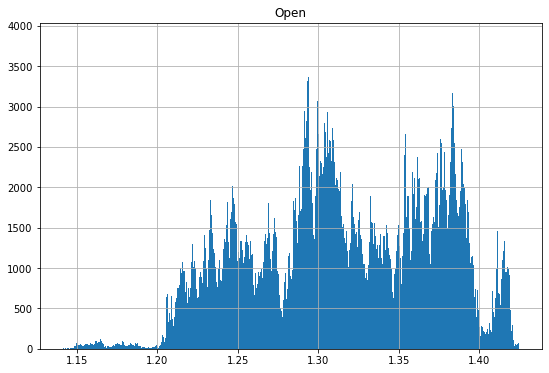

In [678]:
bins = round(math.sqrt(df.shape[0]))
#Plot Distribution of Open price
df.hist(column="Open", figsize=(9,6),bins=bins)

array([[<AxesSubplot:title={'center':'High'}>]], dtype=object)

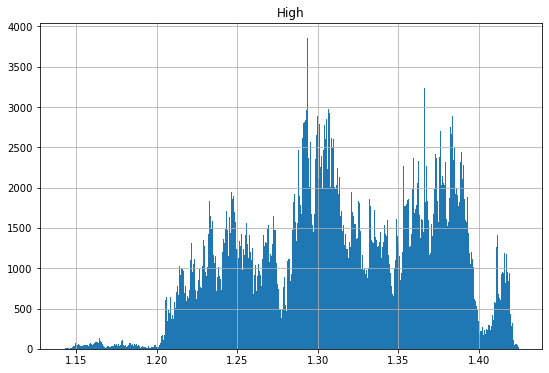

In [679]:
#Plot Distribution of High price
df.hist(column="High", figsize=(9,6),bins=bins)

array([[<AxesSubplot:title={'center':'Close'}>]], dtype=object)

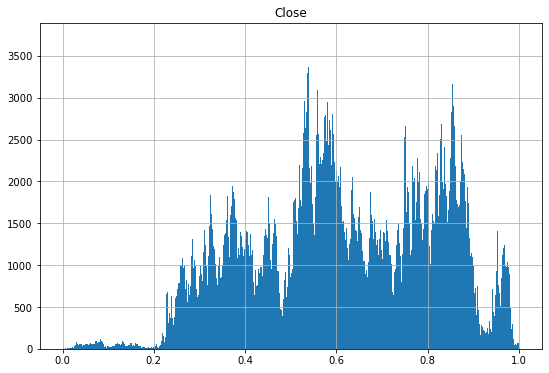

In [680]:
#Plot Distribution of Close price
df.hist(column="Close", figsize=(9,6),bins=bins)

array([[<AxesSubplot:title={'center':'Low'}>]], dtype=object)

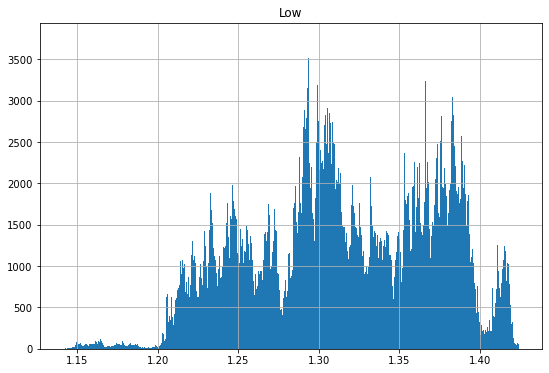

In [681]:
#Plot Distribution of Low price
df.hist(column="Low", figsize=(9,6),bins=bins)

array([[<AxesSubplot:title={'center':'Volume'}>]], dtype=object)

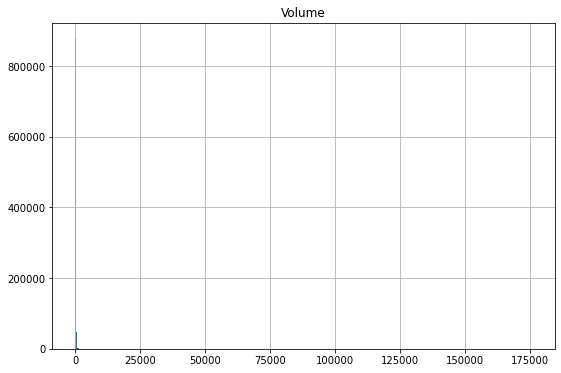

In [682]:
#Plot Distribution of Low price
df.hist(column="Volume", figsize=(9,6),bins=bins)

<h3>Box Plots</h3>

<AxesSubplot:>

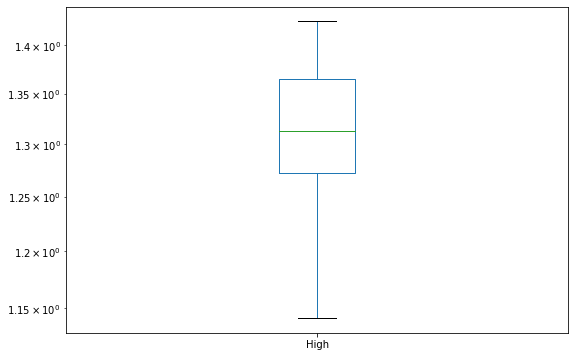

In [683]:
df['High'].plot(kind='box',figsize=(9,6),logy=True)

<AxesSubplot:>

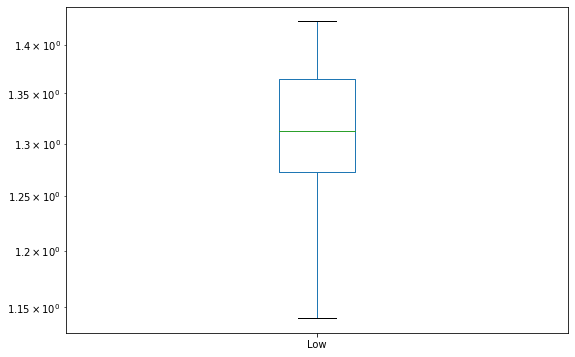

In [684]:
df['Low'].plot(kind='box',figsize=(9,6),logy=True)

<AxesSubplot:>

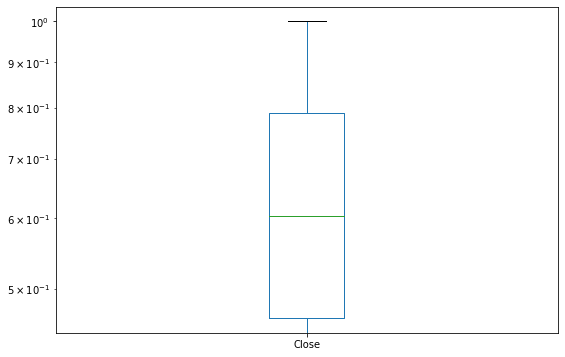

In [685]:
df['Close'].plot(kind='box',figsize=(9,6),logy=True)

<AxesSubplot:>

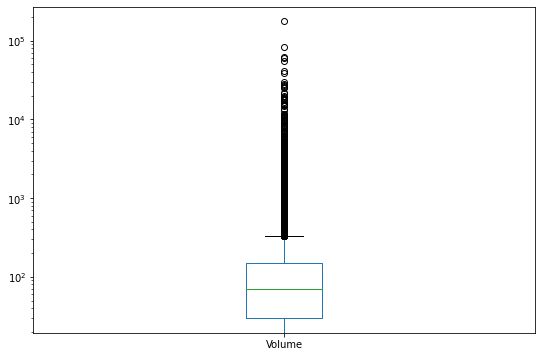

In [686]:
df['Volume'].plot(kind='box',figsize=(9,6),logy=True)

<h3>Scatter Plots</h3>

<AxesSubplot:xlabel='Open', ylabel='Close'>

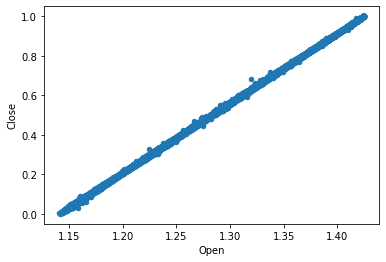

In [687]:
df.plot.scatter(x='Open',y='Close')

<AxesSubplot:xlabel='High', ylabel='Close'>

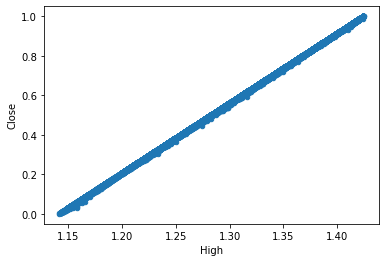

In [688]:
df.plot.scatter(x='High',y='Close')

<AxesSubplot:xlabel='Low', ylabel='Close'>

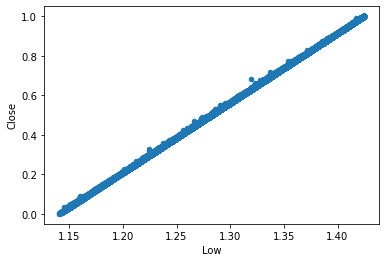

In [689]:
df.plot.scatter(x='Low',y='Close')

<AxesSubplot:xlabel='Volume', ylabel='Close'>

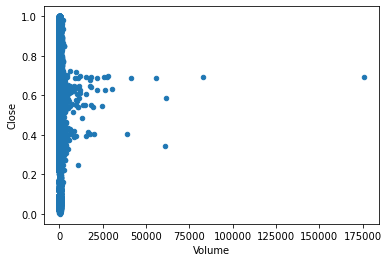

In [690]:
df.plot.scatter(x='Volume',y='Close')

<h3>Conclusion</h3>
<p>From the above diagram we can see that Open price, High Price and Low Price are suitable features to use when training the model.However, the Volume feature is not suitable because the feature has an irregular distribution, many outliers and has a bad correlation to the Closing Price. Thus we will not use the Volume feature to train the model<p>

In [691]:
df = df.drop('Volume',axis=1)
#add the bias column to the dataset
df.insert(loc=0,column='Bias',value=np.ones((df.shape[0],1)))

scaled_X = scaled_X[:,:3]
scaled_X

array([[0.62711984, 0.62613853, 0.6268741 ],
       [0.62719035, 0.62751536, 0.62743853],
       [0.62895321, 0.64138954, 0.62930822],
       ...,
       [0.57338786, 0.57184212, 0.57381734],
       [0.57331735, 0.57307774, 0.57381734],
       [0.57359941, 0.57226576, 0.57318235]])

In [692]:
class LinearRegression:
    def __init__(self,feature_samples,labels):
        self.X = feature_samples
        self.Y = labels
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(self.X,self.Y,test_size=0.2)
        self.parameters = np.ones((self.X.shape[1],1))
        
    def Train(self,epochs=None,epsilon=0.2,learning_rate=0.1):
        parameters = self.parameters
        
        
        if epochs != None:
            for epoch in range(epochs):
                ALR = (learning_rate/len(self.Y_train))              #ALR - Average Learning Rate
                h = np.matmul(self.X_train,self.parameters)          #h - hypothesis function
                error = h-self.Y_train
                correction = np.matmul(self.X_train.T,error)
                parameters = parameters - (ALR*correction)
            self.parameters = parameters
            print("After",epochs,"epochs, we have the following parameters:\n",self.parameters)
            
        else:
            print("In else")
            parameters_cur = self.parameters
            parameters_prev = np.zeros((self.X.shape[1],1))
            print()
            while(LA.norm(parameters_cur - parameters_prev) >= epsilon):
                ALR = (learning_rate/len(self.Y_train))              #ALR - Average Learning Rate
                h = np.matmul(self.X_train,self.parameters)          #h - hypothesis function
                error = h-self.Y_train
                correction = np.matmul(self.X_train.T,error)
                parameters_prev = parameters_cur
                parameters_cur = parameters_cur - (ALR*correction)
                print(parameters_cur.T)
                print("Current Norm = ",LA.norm(parameters_cur - parameters_prev))
                #print("Previous Norm = ",norm_prev)
            self.parameters = parameters_cur
            print("After convergence with epsilon =",epsilon,"we get the following parameters:\n",self.parameters)
                
                
    def Test(self):
        return
    
    
    def Predict(self):
        return

In [693]:
model = LinearRegression(scaled_X,scaled_Y)
model.Train(epochs=None)

In else

[[0.91658889 0.91671763 0.91656414]]
Current Norm =  0.14441228382831867
After convergence with epsilon = 0.2 we get the following parameters:
 [[0.91658889]
 [0.91671763]
 [0.91656414]]


NameError: name 'data' is not defined